In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


In [2]:
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np
# 시각화를 위한 모듈을 불러온다.
import matplotlib.pyplot as plt
# Lasso를 사용하기위한 모듈을 불러온다.
from sklearn.linear_model import lasso_path

# 모형 적합에 사용할 predictor 생성
np.random.seed(1)
n = 1000    #sample size
x1 = np.random.normal(0, 1, (n, 1)) #평균이 0이고 분산이 1인 정규분포
x2 = np.random.normal(0, 1, (n, 1))
e = np.random.normal(0, 1, (n, 1))
x3 = (2/3)*x1 + (2/3)*x2 + (1/3)*e  #x1과 x2에 독립인 확률변수들의 가중합 -> x3가 x1, x2에 correlation이 커짐
x = np.hstack((x1, x2, x3)) #x1, x2, x3를 합쳐서 하나의 predictor로 만듬
x[:6, :]

array([[ 1.62434536, -0.15323616,  1.14391167],
       [-0.61175641, -2.43250851, -1.94991133],
       [-0.52817175,  0.50798434, -0.16282888],
       [-1.07296862, -0.32403233, -1.1349323 ],
       [ 0.86540763, -1.51107661, -1.10709434],
       [-2.3015387 , -0.87142207, -1.91265831]])

In [4]:
# case 1.
beta1 = np.array([[2], [3]])
# 모형 적합에 사용할 response variable 생성
y = np.hstack((x1, x2)) @ beta1 + np.random.normal(0, 1, (n, 1))
y[:6, :]
#y는 x1과 x2에만 의존함

array([[ 2.64861125],
       [-8.37939669],
       [ 0.77957812],
       [-2.34894905],
       [-2.2181288 ],
       [-5.42875094]])

In [11]:
# Lasso penalty regression의 solution path
eps = 5e-3
lambdas_lasso, coefs_lasso, _ = lasso_path(x, y, 
                                          eps=eps)
coefs_lasso.shape #beta가 3개, lambda가 100개임

(1, 3, 100)

In [12]:
coefs_lasso = np.squeeze(coefs_lasso)
coefs_lasso[:,20] #lambda가 20일때의 결과

#첫 번째 predictor가 중요하지만 선택을 못받았음

array([0.        , 0.85352138, 1.64703737])

(-0.15238089877976926,
 3.5745664467946994,
 -0.14885218500214423,
 3.1258958850450287)

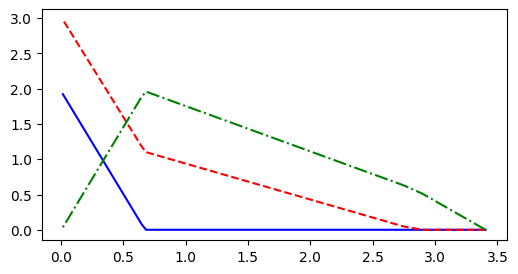

In [13]:
# solution path 시각화
plt.figure(figsize=(6, 3))
colors = ['b', 'r', 'g']
lstyles = ['-', '--', '-.', ':']
for coef_l, c, ltype in zip(coefs_lasso, colors, lstyles):
    l = plt.plot(lambdas_lasso, coef_l, 
                 linestyle=ltype, c=c)
plt.axis('tight')
#beta1과 beta2만 중요하다는 것을 알 수가 없음

In [14]:
# case 2.
beta2 = np.array([[-2], [3]])
# 모형 적합에 사용할 response variable 생성
y = np.hstack((x1, x2)) @ beta2 + np.random.normal(0, 1, (n, 1))
y[:6, :]


array([[-1.22645397],
       [-5.84739325],
       [ 2.44238028],
       [ 0.63229101],
       [-7.06863708],
       [ 2.91943858]])

In [16]:
# Lasso penalty regression의 solution path
eps = 5e-3
lambdas_lasso, coefs_lasso, _ = lasso_path(x, y, 
                                          eps=eps)
coefs_lasso = np.squeeze(coefs_lasso)
coefs_lasso.shape
coefs_lasso[:,20]

array([-0.91104367,  1.93286645,  0.        ])

(-0.13831769107434116,
 3.244670306263455,
 -2.266716771218843,
 3.188631949870484)

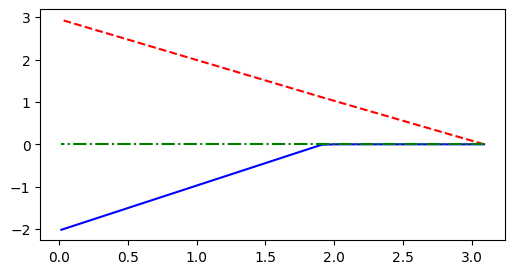

In [17]:
# solution path 시각화
plt.figure(figsize=(6, 3))
colors = ['b', 'r', 'g']
lstyles = ['-', '--', '-.', ':']
for coef_l, c, ltype in zip(coefs_lasso, colors, lstyles):
    l = plt.plot(lambdas_lasso, coef_l, 
                 linestyle=ltype, c=c)
plt.axis('tight')
#세번째 변수는 0으로 남아있음ㅜ